In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-email-dataset/fraud_email_.csv


In [2]:
import pandas

df = pandas.read_csv("/kaggle/input/fraud-email-dataset/fraud_email_.csv")
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [3]:
df.shape

(11929, 2)

In [4]:
df.columns

Index(['Text', 'Class'], dtype='object')

In [5]:
#check whether got Nan values inside dataframe
print(df.isna().any()) 

# if got we will drop the nan values
df.dropna(inplace=True)

Text      True
Class    False
dtype: bool


In [6]:
# check duplicated row
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

1679


0    5915
1    4334
Name: Class, dtype: int64


Text(0, 0.5, 'Data Count')

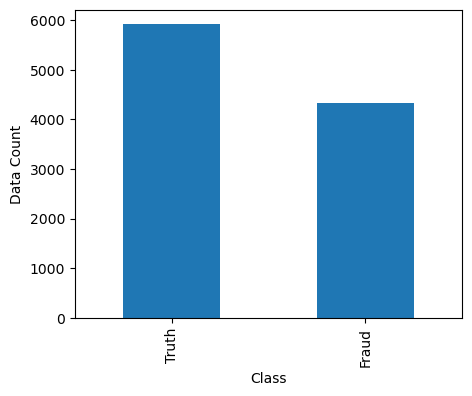

In [7]:
from matplotlib import pyplot as plt

print(df["Class"].value_counts())

# check whether it's a balanced datasets or not
plt.figure(figsize=(5,4))
df["Class"].map({0:"Truth",1:"Fraud"}).value_counts().plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Data Count")

In [8]:
# import all library needed
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


# Without Preprocessing

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Class"], test_size=0.2, random_state=2023)

## Multinomial Naive Bayes

In [10]:
clf = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,1))),
    ("Mulitnomial NB", MultinomialNB())
])

model = clf.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [11]:
# classification report for Multinomial NB
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1177
           1       0.95      0.99      0.97       873

    accuracy                           0.98      2050
   macro avg       0.97      0.98      0.98      2050
weighted avg       0.98      0.98      0.98      2050



## SVC

In [12]:
from sklearn.svm import SVC

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,1))),
    ("svc", SVC())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [13]:
# classification report for SVC model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1177
           1       1.00      0.97      0.98       873

    accuracy                           0.99      2050
   macro avg       0.99      0.99      0.99      2050
weighted avg       0.99      0.99      0.99      2050



# With Preprocessing

In [14]:
# preprocess word
# remove punctuations, stop words, and then lemmatize words

from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(str(text))
    lemma_token: list = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return " ".join(lemma_token)

df["Text"] = df["Text"].apply(preprocess)

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Class"], test_size=0.2, random_state=2023)

## Multinomial Naive Bayes Model

### unigrams - Bag of n-words

In [16]:
clf = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,1))),
    ("Mulitnomial NB", MultinomialNB())
])

model = clf.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [17]:
# classification report for Multinomial NB
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1177
           1       0.96      0.99      0.98       873

    accuracy                           0.98      2050
   macro avg       0.98      0.98      0.98      2050
weighted avg       0.98      0.98      0.98      2050



### trigrams - Bag of n-words

In [18]:
clf = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(3,3))),
    ("Mulitnomial NB", MultinomialNB())
])

model = clf.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


In [19]:
# classification report for Multinomial NB
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1177
           1       1.00      0.95      0.97       873

    accuracy                           0.98      2050
   macro avg       0.98      0.97      0.98      2050
weighted avg       0.98      0.98      0.98      2050



## SVC Model

### unigrams - Bag of n-words

In [20]:
from sklearn.svm import SVC

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,1))),
    ("svc", SVC())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1177
           1       0.99      0.97      0.98       873

    accuracy                           0.99      2050
   macro avg       0.99      0.99      0.99      2050
weighted avg       0.99      0.99      0.99      2050



### trigrams - Bag of n-words

In [22]:
from sklearn.svm import SVC

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(3,3))),
    ("svc", SVC())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1177
           1       1.00      0.84      0.91       873

    accuracy                           0.93      2050
   macro avg       0.95      0.92      0.93      2050
weighted avg       0.94      0.93      0.93      2050



### unigrams to trigrams - Bag of n-words



In [24]:
from sklearn.svm import SVC

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,3))),
    ("svc", SVC())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1177
           1       0.99      0.97      0.98       873

    accuracy                           0.98      2050
   macro avg       0.99      0.98      0.98      2050
weighted avg       0.98      0.98      0.98      2050



## Random Forest Model

### unigrams - Bag of n-words

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,1))),
    ("random forest", RandomForestClassifier())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1177
           1       0.99      0.98      0.98       873

    accuracy                           0.99      2050
   macro avg       0.99      0.98      0.99      2050
weighted avg       0.99      0.99      0.99      2050



### unigrams to trigrams - Bag of n-words

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,3))),
    ("random forest", RandomForestClassifier())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1177
           1       0.98      0.96      0.97       873

    accuracy                           0.97      2050
   macro avg       0.97      0.97      0.97      2050
weighted avg       0.97      0.97      0.97      2050



# The Best Model

The best model is SVC model without preprocessing, with unigrams language models.

In [30]:
import pandas

df = pandas.read_csv("/kaggle/input/fraud-email-dataset/fraud_email_.csv")
df.head()

print(df.isna().any())
df.dropna(inplace=True)

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# train test split
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Class"], test_size=0.2, random_state=2023)

Text      True
Class    False
dtype: bool
1679


In [31]:
from sklearn.svm import SVC

clf = Pipeline([
    ("vectorizer",TfidfVectorizer(ngram_range=(1,1))),
    ("svc", SVC())
])

model = clf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 0]


Text(33.22222222222222, 0.5, 'Truth')

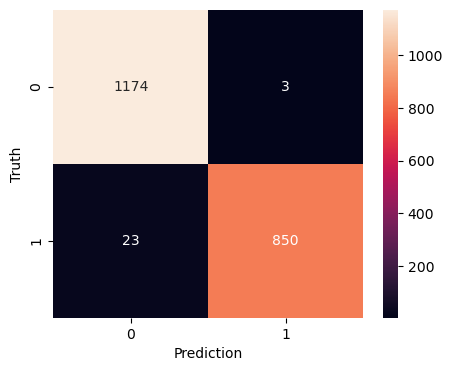

In [32]:
# print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")



# Observation